In [5]:
!pip install HTMLrenderer -q
!pip install ensure

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some Information of CNN

In [7]:
from HTMLrenderer.render import render_site

URL = "https://slides.com/supremecommander/cnn-architecture/fullscreen"
render_site(URL=URL, width="100%", height="600")

response_status: 200 OK


'success'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
Root  = "/content/drive/MyDrive/images/"
os.chdir(Root)

In [2]:
os.getcwd()

'/content/drive/MyDrive/images'

In [3]:
# Importing some important library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
# Read image function 
def read_img(path,grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # converting bgr to gray 
    plt.imshow(img,cmap='gray')    # showing image using matplotlib
    return img

  try:
    cv2.imshow("display",img)  # This works for local environment
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is for colab
    cv2_imshow(img)
    return img

In [5]:
img_path = 'car1.jpeg'

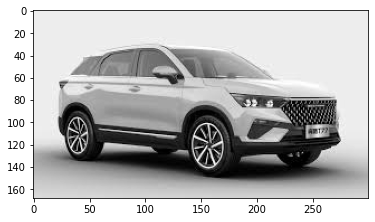

In [6]:
car = read_img(path = img_path,grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



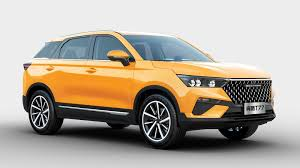

In [7]:
color_car = read_img(path = img_path,grayscale=False)

In [8]:
car.shape

(168, 300)

In [9]:
car

array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [216, 216, 216, ..., 211, 211, 211],
       [217, 217, 217, ..., 213, 213, 213],
       [217, 217, 217, ..., 214, 214, 214]], dtype=uint8)

In [10]:
color_car.shape

(168, 300, 3)

**Apply a single conv layer**

In [11]:
row, col = car.shape
batch = 1    # we want convolution layer for single image.
ch = 1       # grayscale means single channel
reshaped_car_img = car.reshape(batch,row,col,ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [12]:
reshaped_car_img.shape[1:]

(168, 300, 1)

In [13]:
# Creation of convolution layer

input_shape = reshaped_car_img.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),strides=(1,1),input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Explain :- Total params: kernel_size(3,3) = 3 multiply 3 add 1(bias) which is also        trainable parameter. kernel_size means filter of (3,3) size.

In [14]:
# Making prediction on the conv model
# out = conv_model.predict(car)   # This will produce error as car is not reshaped.

out = conv_model.predict(reshaped_car_img)

In [15]:
# let's check shape of the output image from conv model
out.shape

(1, 166, 298, 1)

observation :- rows and cols of the output image is less than original

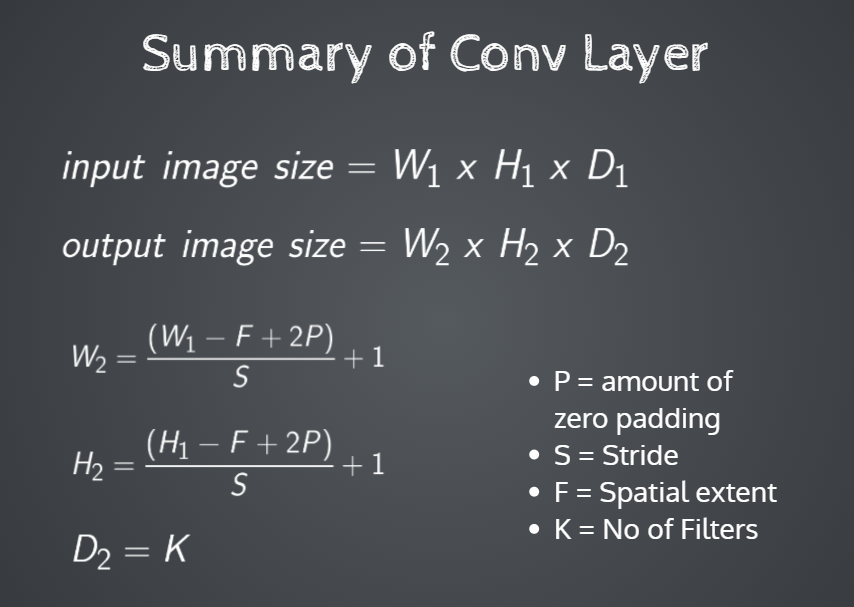

In [16]:
#output image rows
output_img_row =  (168 - 3 +2*(0))//1 + 1  #(original_img_rows-filter_size+2(padding))//strides + 1
output_img_row

166

In [17]:
#output image cols or hight
output_img_cols =  (300 - 3 +2*(0))//1 + 1  #(original_img_cols-filter_size+2(padding))//strides + 1
output_img_cols

298

TypeError: ignored

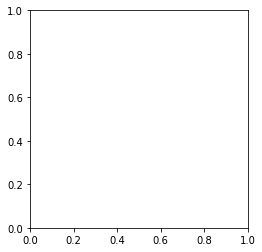

In [18]:
plt.imshow(out,cmap='gray')

observation :- we can't directly pass output image to plt or cv2.imshow.we need to reshape it again to image data format

In [19]:
# ways to extract shape from output image
# 1
row, col = out.shape[1:-1]
row, col
# 2
_, row, col, _ = out.shape
row, col

(166, 298)

In [20]:
# reshaping output image
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

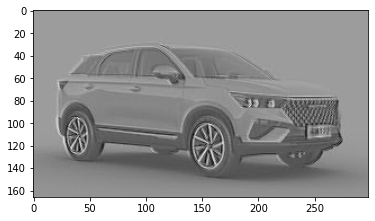

In [21]:
# showing the reshaped output image
plt.imshow(reshape_out,cmap='gray')

Observation :- The filters applied on the image is illuminating some features of car. This filters applied is random.

**For Color Image**

In [22]:
color_car.shape

(168, 300, 3)

In [23]:
# reshaping color_car
# (1, row, col, channel)
row,col,ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row,col,ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [24]:
# creating convolutinal model
input_shape = color_car_reshaped.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Total Params = 28 
# since input shape has 3 channels and so filters with size 3*3 size with 3 channel will be required.
3*3*3 + 1   # so 3(height)*3(weight)*3(channel) + 1(bias) trainable parameters

28

In [26]:
color_out = conv_model.predict(color_car_reshaped)

In [27]:
color_out.shape

(1, 166, 298, 1)

In [28]:
(168 - 3 + 2*0)//1 + 1  # (168(row)-3(spatial extent or filter size) + 2(padding)) //stride + 1

166

In [29]:
(300 - 3 + 2*0)//1 + 1   # (168(col)-3(spatial extent or filter size) + 2(padding)) //stride + 1

298

In [30]:
_, row, col, _ = color_out.shape
row, col

(166, 298)

In [31]:
reshape_out = color_out.reshape(row, col)
reshape_out.shape

(166, 298)

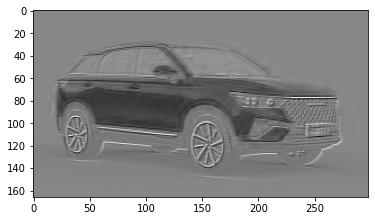

In [32]:
plt.imshow(reshape_out, cmap="gray")

observation:- output image is illumating some features of the image.

**Functional Implementation**

In [33]:
# Reshaping function
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [34]:
# convolution model function
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):

  CONV_LAYER = [
    
      tf.keras.layers.Conv2D(
          filters=filters, 
          kernel_size=kernel_size, 
          strides=strides, 
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [35]:
# visualization function
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



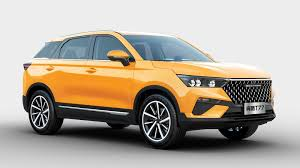

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


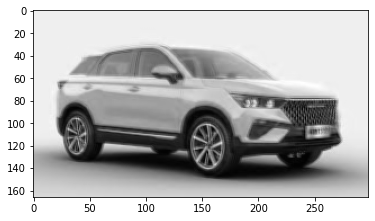

In [36]:
# Execution of the above functions
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Observation:- For one Filter, we get one output image which illuminates some features of the car image.

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



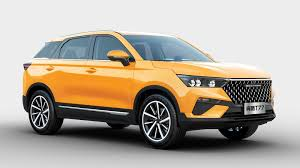

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)


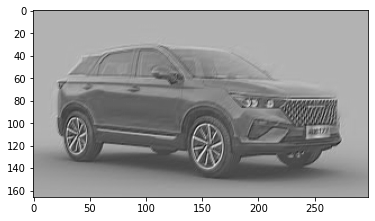

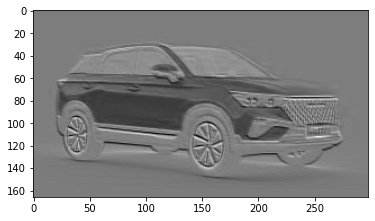

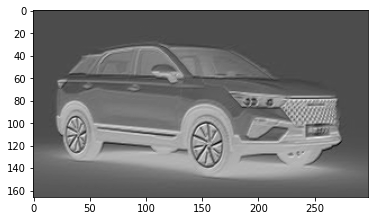

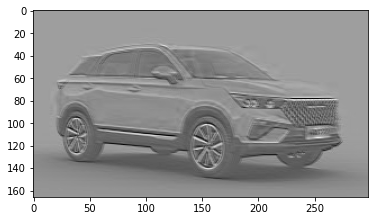

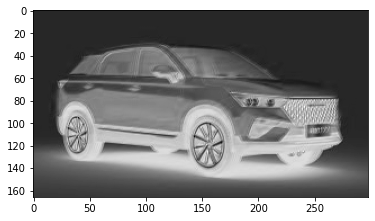

In [37]:
# Execution of the above functions
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5,    # here, filters = 5 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Observation:- Above, we applied filters=5, therefore, five output images are produces which illumates or shows five different features of the car image. Also, trainable parameter are 28 multiply 5 equal to 140.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


(1, 166, 298, 1)


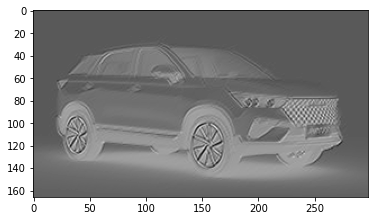

In [38]:
# Here, we use grayscale image
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 166, 298, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


(1, 166, 298, 5)


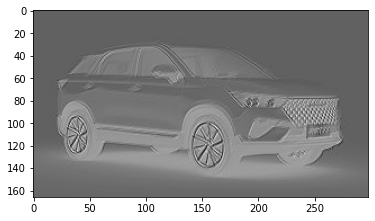

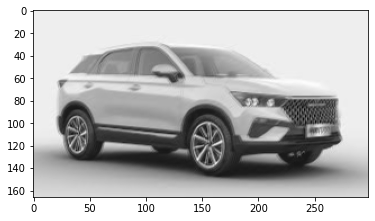

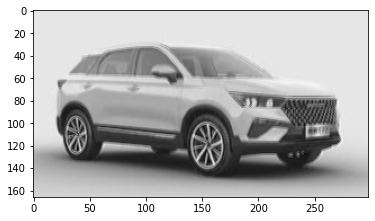

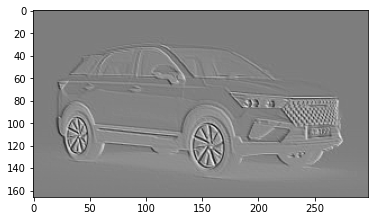

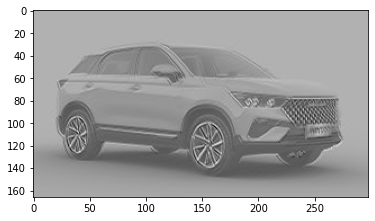

In [39]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=5,  # filters = 5
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

**Max-Pooling**

In [40]:
# Function for max-pooling 
def max_pooling(img,pool_size=(2,2),strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides=strides)
  result = pooling_layer(reshaped_img)
  return result

(168, 300)


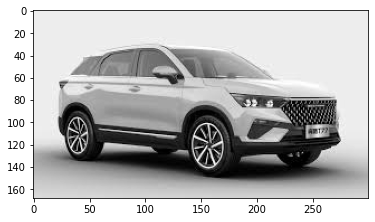

In [41]:
img = read_img(img_path)
print(img.shape)

In [55]:
# max-pooling on the img
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


Observation:- Huge reduction in the shape of the resultant image after max-pooling

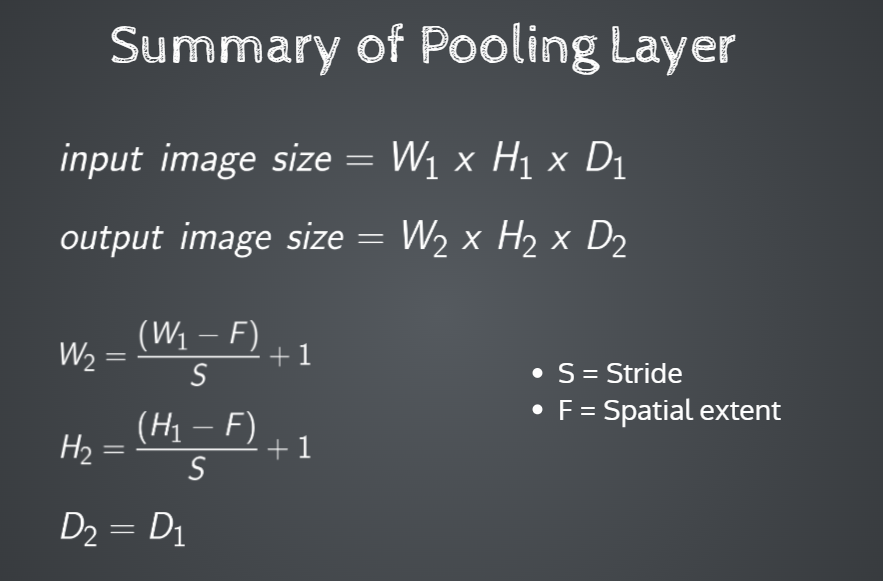

In [56]:
# rows or width of the resultant image
(168-2)//2 + 1    # (rows-spatial extent)// strides +1

84

In [57]:
# cols or height of the resultant image
(300-2)//2 + 1    # (cols-spatial extent)// strides +1

150

In [58]:
# we can show the resultant image
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

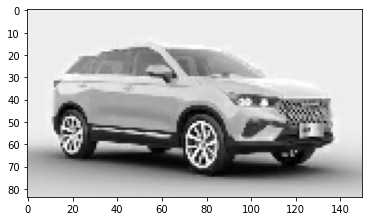

In [59]:
plot_pooling(result)

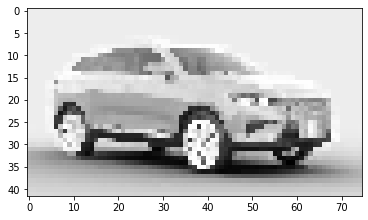

In [60]:
# Again giving the last result image for max-pooling
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

result = max_pooling(reshape.numpy())
result.shape

plot_pooling(result)